# MultiOn Tracking Web Browse Actions
<img src="https://github.com/AgentOps-AI/agentops/blob/b4aac2d4b9fb16d6aa0a25aa9018210a94f1bef2/docs/logo/multion_integration.png?raw=true" width="250px" style="max-width: 100%; height: auto;"/>
    
Agents using MultiOn can launch and control remote or local web browsers to perform actions and retrieve context using natural language commands. With AgentOps, MultiOn evens such as browse, retrieve, and step are automatically tracked.


![AgentOps MultiOn Browse](https://github.com/AgentOps-AI/agentops/blob/main/docs/images/agentops-multion-browse.gif?raw=true)

Furthermore, events and LLM calls in your Python program will be tracked as well.

First let's install the required packages

In [ ]:
%pip install -U multion
%pip install -U agentops
%pip install -U openai
%pip install -U python-dotenv

Then import them

In [ ]:
from multion.client import MultiOn
from multion.core.request_options import RequestOptions
import openai
import agentops
import os
from dotenv import load_dotenv

Next, we'll grab our API keys. You can use dotenv like below or however else you like to load environment variables

In [ ]:
load_dotenv()
MULTION_API_KEY = os.getenv("MULTION_API_KEY") or "<your_multion_key>"
AGENTOPS_API_KEY = os.getenv("AGENTOPS_API_KEY") or "<your_agentops_key>"
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY") or "<your_openai_key>"

### Tracking MultiOn events with AgentOps

When an `agentops_api_key` is provided, MultiOn will automatically start an AgentOps session and record events.

In [ ]:
multion = MultiOn(
    api_key=MULTION_API_KEY,
    agentops_api_key=AGENTOPS_API_KEY,
)
cmd = "what three things do i get with agentops"
request_options = RequestOptions(
    timeout_in_seconds=60, max_retries=4, additional_headers={"test": "ing"}
)

browse_response = multion.browse(
    cmd="what three things do i get with agentops",
    url="https://www.agentops.ai/",
    max_steps=4,
    include_screenshot=True,
    request_options=request_options,
)

print(browse_response.message)

# End session to see your dashboard
agentops.end_session("Success")

### Linking MultiOn events to an existing AgentOps session
When running `agentops.init()`, be sure to set `auto_start_session=False`. MultiOn will automatically launch AgentOps sessions by default, but by setting auto start to false, you can configure your AgentOps client independently.

In [ ]:
agentops.init(AGENTOPS_API_KEY, auto_start_session=False, default_tags=["MultiOn browse example"])

Now, we can launch a MultiOn browse event. This event will automatically get added to your AgentOps session.

In [ ]:
multion = MultiOn(
    api_key=MULTION_API_KEY,
    agentops_api_key=AGENTOPS_API_KEY,
)
cmd = "what three things do i get with agentops"
request_options = RequestOptions(
    timeout_in_seconds=60, max_retries=4, additional_headers={"test": "ing"}
)

browse_response = multion.browse(
    cmd="what three things do i get with agentops",
    url="https://www.agentops.ai/",
    max_steps=4,
    include_screenshot=True,
    request_options=request_options,
)

print(browse_response.message)

Let's use OpenAI to summarize our output

In [ ]:
messages = [
    {
        "role": "user",
        "content": f"Format this data as a markdown table: {browse_response.message}",
    }
]
client = openai.OpenAI()
response = client.chat.completions.create(messages=messages, model="gpt-3.5-turbo")

print(response.choices[0].message.content)

In [ ]:
agentops.end_session("Success")

## Check your session
Check your session on [AgentOps](https://app.agentops.ai). This session should include the MultiOn browse action and the OpenAI call.

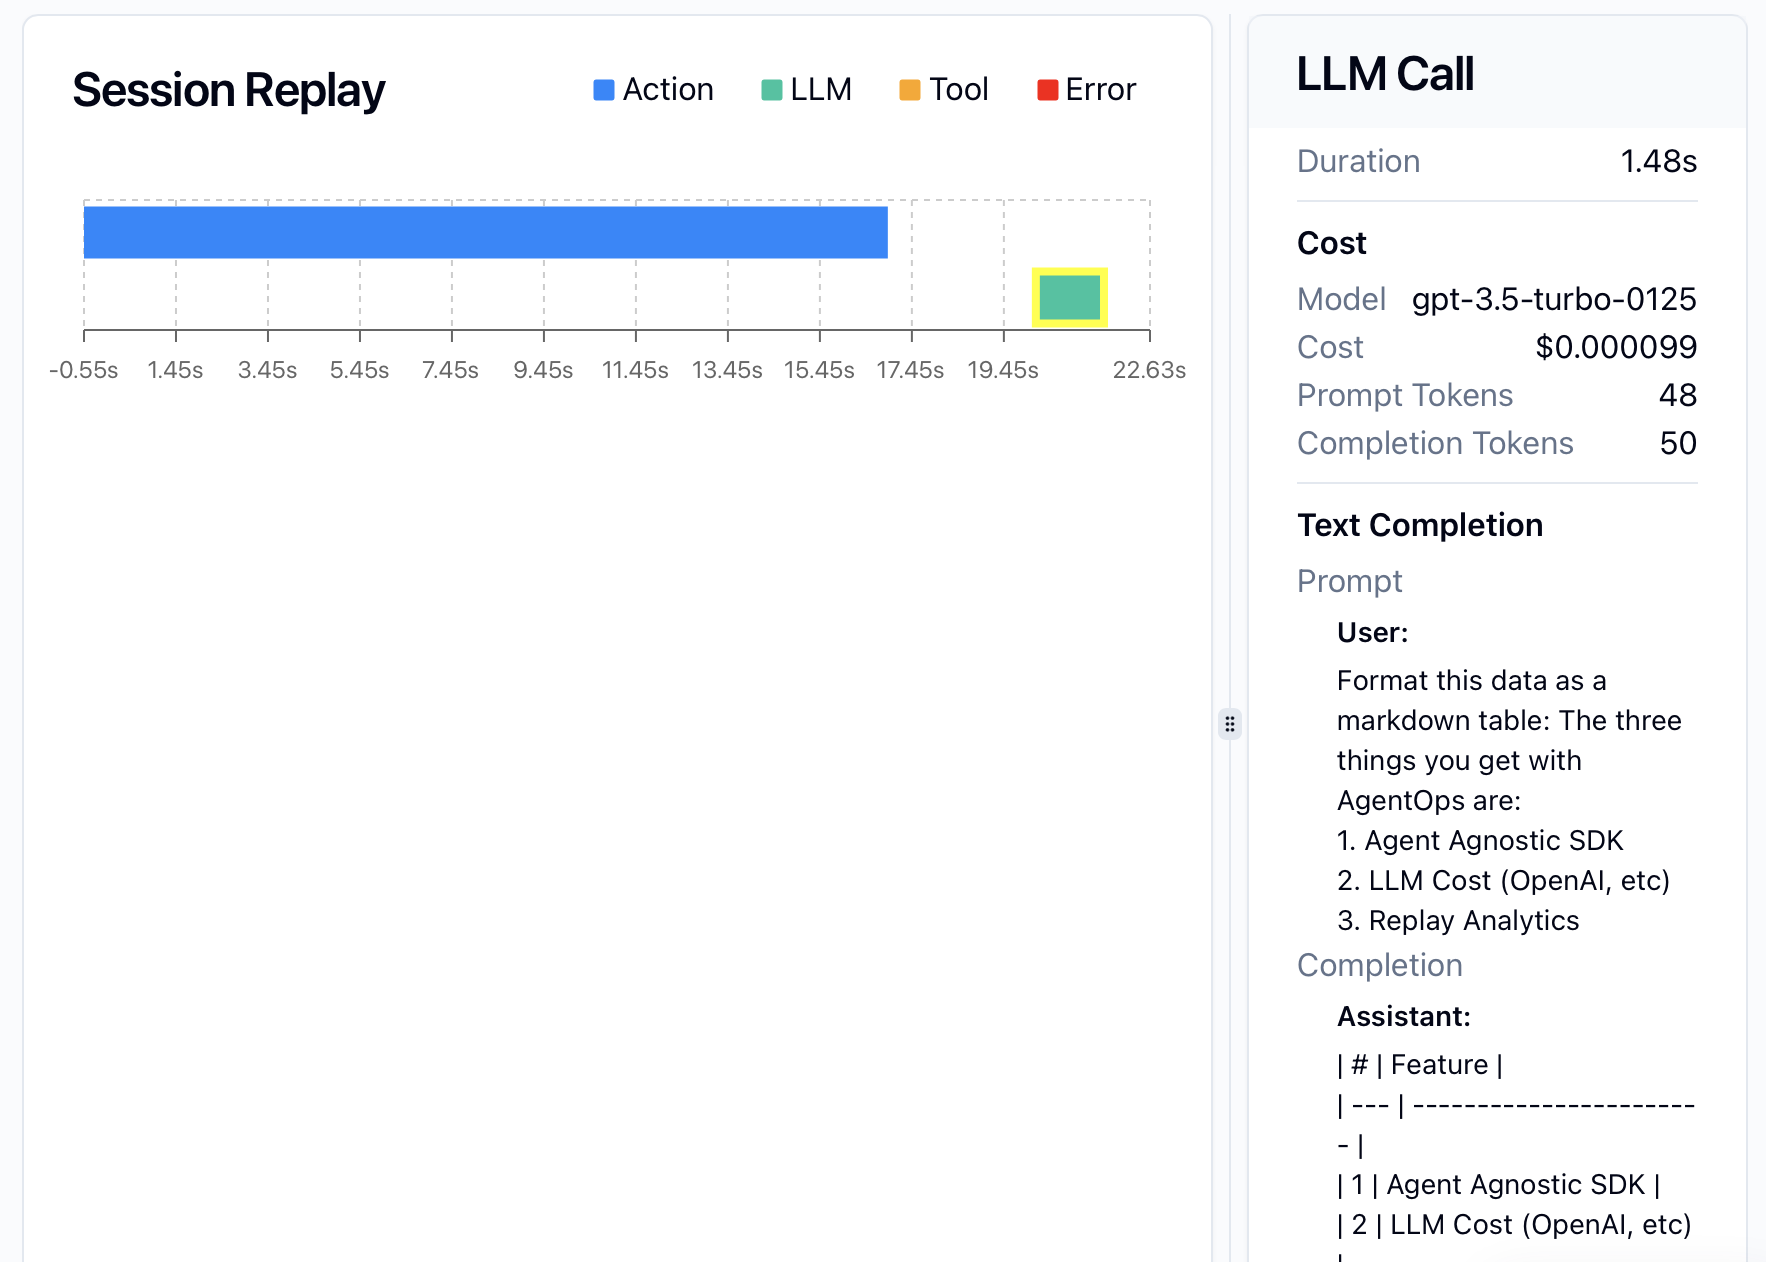